In [95]:

from assimulo.solvers import CVode
from assimulo.problem import Explicit_Problem
import numpy as np
import matplotlib.pyplot as plt

def lorenz(t,y):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    s=10
    r=28
    b=2.667
    x, y, z = y[0],y[1],y[2]
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])





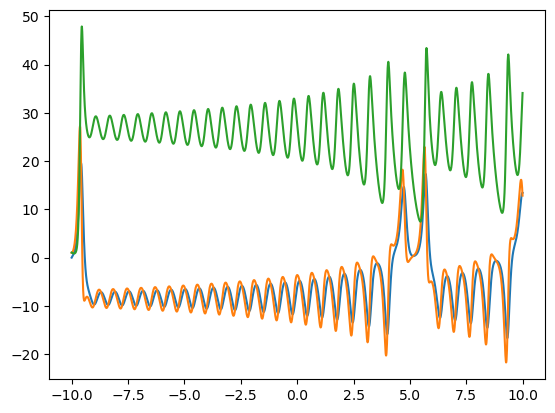

In [99]:

y0=[0,1,1.05]
t=np.arange(-10,10,0.01)

mod = Explicit_Problem(lorenz, y0, t[0])
sim = CVode(mod)

sim.verbosity=50
# sim.simulate(tfinal=t[-1])
sol=sim.simulate(tfinal=t[-1],ncp=0,ncp_list=t)



plt.plot(sol[0],sol[1])


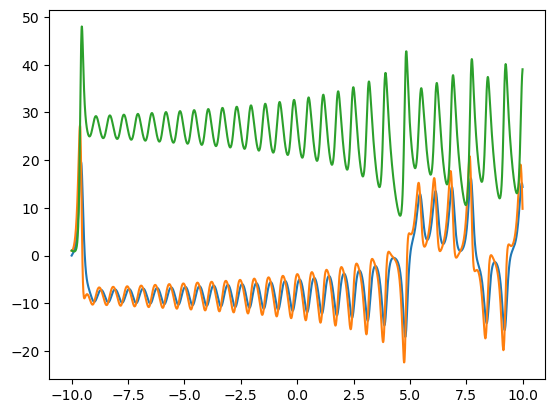

In [92]:
from scipy.integrate import solve_ivp
sol=solve_ivp(lorenz,t_span=[t.min(),t.max()],t_eval=t,y0=y0)

plt.plot(sol.t,sol.y[0,:])
plt.plot(sol.t,sol.y[1,:])
plt.plot(sol.t,sol.y[2,:])